In [14]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv("../../Datas/gz2_hart16.csv")
df = data.copy()

In [16]:
from IPython.core.display import display

def checkIfHasRowIncompatible(dataset, rowName1, rowName2):
    return dataset[dataset[rowName1] == 1][dataset[rowName2] == 1].shape[0] > 0

def VisualiseDataset(dataset):

    print("En-tête du dataset :\n----------\n")
    display(dataset.head(10))

    print("Informations des types du dataset :\n----------\n")
    display(dataset.info())

    print("\n----------\nTaille du dataset :")
    display(dataset.shape)

    print("Informations du dataset :\n----------\n")
    display(dataset.describe())

    print("Pourcentage de valeurs manquantes :\n----------\n")
    display((df.isna().sum()/df.shape[0]).sort_values())

    print("Type des valeurs :\n----------\n")
    display(df.dtypes.value_counts().plot.pie())

    print("Classes : \n-------------\n")
    display(dataset["gz2_class"].unique())

En-tête du dataset :
----------



,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
5,587729751132209314,246.921387,40.926968,16:27:41.13,+40:55:37.1,extra,Ei,48,154,41,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
6,587733608555216981,249.474640,36.073040,16:37:53.91,+36:04:22.9,original,Ei,39,142,25,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
7,587735742617616406,243.146759,29.365067,16:12:35.22,+29:21:54.2,original,Sb+t,35,282,0,...,0.457,0.442,0.480484,0,8,8.0,0.229,0.235,0.230543,0
8,587738574068908121,195.278030,39.841473,13:01:06.73,+39:50:29.3,original,Ei,50,158,42,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
9,587731870708596837,183.062057,56.177532,12:12:14.89,+56:10:39.1,original,Sb?t,43,275,8,...,0.048,0.048,0.049229,0,9,9.0,0.429,0.429,0.426677,0


Informations des types du dataset :
----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239695 entries, 0 to 239694
Columns: 231 entries, dr7objid to t11_arms_number_a37_cant_tell_flag
dtypes: float64(150), int64(77), object(4)
memory usage: 422.4+ MB


None


----------
Taille du dataset :


(239695, 231)

Informations du dataset :
----------



,dr7objid,ra,dec,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
count,2.396950e+05,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,...,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.00000,239695.000000,239695.000000
mean,5.878182e+17,185.348053,26.077803,42.569745,179.024565,27.609679,27.483195,0.639344,0.645559,0.397942,...,0.017008,0.016616,0.025175,0.009954,1.750203,1.747810,0.263493,0.26239,0.250457,0.140570
std,1.827461e+14,47.905084,18.209517,5.856933,60.729097,13.261534,13.243674,0.284853,0.288195,0.346484,...,0.098695,0.096988,0.121978,0.099274,3.266551,3.264901,0.364091,0.36351,0.356535,0.347578
min,5.877230e+17,0.006464,-3.743851,16.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.877327e+17,154.106384,10.665661,39.000000,140.000000,18.000000,18.000000,0.455000,0.459000,0.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,5.877393e+17,185.964218,24.761133,43.000000,156.000000,32.000000,32.000000,0.760000,0.768000,0.326000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,5.877429e+17,219.843925,39.732906,46.000000,196.000000,38.000000,38.000000,0.863000,0.871000,0.776000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.500000,0.50000,0.434294,0.000000
max,5.888489e+17,359.988831,70.133217,79.000000,604.000000,68.000000,66.280998,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,33.000000,33.000000,1.000000,1.00000,1.000000,1.000000


Pourcentage de valeurs manquantes :
----------



dr7objid                                       0.000000
t08_odd_feature_a23_other_fraction             0.000000
t08_odd_feature_a23_other_weighted_fraction    0.000000
t08_odd_feature_a23_other_debiased             0.000000
t08_odd_feature_a23_other_flag                 0.000000
                                                 ...   
t07_rounded_a16_completely_round_debiased      0.001001
t06_odd_a14_yes_debiased                       0.001151
t03_bar_a07_no_bar_debiased                    0.001168
t04_spiral_a09_no_spiral_debiased              0.001202
t02_edgeon_a05_no_debiased                     0.001227
Length: 231, dtype: float64

Type des valeurs :
----------



<AxesSubplot:ylabel='None'>

Classes : 
-------------



array(['Sc+t', 'Sb+t', 'Ei', 'Er', 'Sb?t', 'Sb1m(i)', 'Sb2t', 'SBb2m',
       'SBc3m', 'Sc2t', 'Sb(d)', 'Sb3t', 'Ec', 'Sb3m', 'Er(o)', 'SBc(r)',
       'Sb', 'Ei(r)', 'Ser', 'Ei(m)', 'SBb+t', 'Sc2m', 'Sb?t(r)',
       'Sb1m(d)', 'Sc3t', 'SBb?t(m)', 'Sc(u)', 'Ser(u)', 'SBc2m',
       'Ser(m)', 'SBb2t', 'Sc?t(r)', 'Sb?t(d)', 'Sb?m(r)', 'Sb?m',
       'Ei(o)', 'SBb4t', 'Ser(o)', 'SBb?t', 'SBc2t', 'SBb2l(i)',
       'Sb?t(i)', 'Sb(r)', 'Sb2l(m)', 'SBb2m(r)', 'Sc4m(m)', 'SBc2l',
       'Sc?t', 'SBb(r)', 'Sb1m(r)', 'Sc4t', 'Sc3m', 'Sc4m', 'Sb1m(m)',
       'SBc4t', 'Sb1m', 'Sa2l(m)', 'SBc?t', 'Sb1t(r)', 'Er(m)', 'Sc?t(m)',
       'SBb', 'Sc(o)', 'SBb3t', 'SBb3t(m)', 'Sb1t(d)', 'SBb2l',
       'SBb2l(m)', 'Ei(d)', 'Sb2l(r)', 'Sc2m(r)', 'Sc+m', 'Ei(i)',
       'Sc2m(d)', 'Er(l)', 'SBb3m', 'Sb4t', 'Sb2l', 'Sb1t', 'Sb3m(r)',
       'SBb2l(r)', 'Sb3m(m)', 'Sb?m(i)', 'Sb1l(m)', 'Sb+m', 'SBa(o)',
       'Sb2m', 'Ser(d)', 'Sc(r)', 'Sb?m(m)', 'SBc4m', 'Sb2m(r)', 'Er(r)',
       'Sb?l(i)', 'SBc3t', 'S

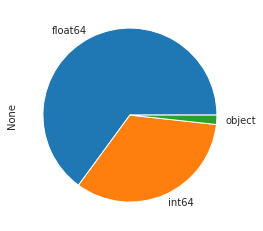

In [17]:
VisualiseDataset(df)

In [18]:
regexMap = {
    r'^SB?a$': 'S0',
    r'^Sa[\d,+,?]t$': 'Sa',
    r'^Sb[\d,+,?]m$': 'Sb',
    r'^Sc[\d,+,?]l$': 'Sc',

    r'^SBa[\d,+,?]t$': 'SBa',
    r'^SBb[\d,+,?]m$': 'SBb',
    r'^SBc[\d,+,?]l$': 'SBc',

    r'^Er$': 'E0',
    r'^Ei$': 'E3-5',
    r'^Ec$': 'E7',
}

In [19]:
dfHubble = df

In [20]:
def classToHubble(oldClass):
    for key in regexMap:
        if re.match(key, oldClass): return regexMap[key]

dfHubble['gz2_class'] = dfHubble['gz2_class'].map(classToHubble)

dfHubble.head()

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,None,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,None,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,E3-5,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,None,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,E0,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


In [21]:
dfHubble = dfHubble[dfHubble['gz2_class'].notnull()]

En-tête du dataset :
----------



,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,E3-5,36,125,28,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,E0,43,151,33,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
5,587729751132209314,246.921387,40.926968,16:27:41.13,+40:55:37.1,extra,E3-5,48,154,41,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
6,587733608555216981,249.474640,36.073040,16:37:53.91,+36:04:22.9,original,E3-5,39,142,25,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
8,587738574068908121,195.278030,39.841473,13:01:06.73,+39:50:29.3,original,E3-5,50,158,42,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
10,587745403080146952,152.301804,15.005116,10:09:12.43,+15:00:18.4,original,E0,51,191,38,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
11,587728668803793002,119.617126,37.786617,07:58:28.11,+37:47:11.8,original,E3-5,42,139,39,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
12,587742012763668552,224.865158,16.645098,14:59:27.64,+16:38:42.4,original,E0,35,119,31,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
13,587741600954712088,175.636871,26.488888,11:42:32.85,+26:29:20.0,original,E0,49,166,45,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
14,587744728224825375,139.538727,16.198111,09:18:09.29,+16:11:53.2,original,E3-5,39,137,31,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0


Informations des types du dataset :
----------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103449 entries, 2 to 239694
Columns: 231 entries, dr7objid to t11_arms_number_a37_cant_tell_flag
dtypes: float64(150), int64(77), object(4)
memory usage: 183.1+ MB


None


----------
Taille du dataset :


(103449, 231)

Informations du dataset :
----------



,dr7objid,ra,dec,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
count,1.034490e+05,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,...,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000,103449.000000
mean,5.878183e+17,185.238653,26.221174,43.668793,153.331825,35.443842,35.309322,0.807428,0.815570,0.688624,...,0.014384,0.013901,0.016071,0.012383,0.491875,0.490206,0.203210,0.201646,0.197900,0.158851
std,1.828762e+14,47.691134,18.369759,5.050236,40.105725,9.470913,9.456942,0.189765,0.191547,0.258569,...,0.109385,0.107373,0.116469,0.110588,1.186806,1.185435,0.373929,0.372798,0.370284,0.365539
min,5.877230e+17,0.042151,-3.740869,18.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.877326e+17,154.612778,10.523474,41.000000,134.000000,33.000000,33.000000,0.800000,0.811000,0.590000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.877392e+17,185.607117,25.038912,43.000000,144.000000,37.000000,37.000000,0.864000,0.874000,0.795000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.877429e+17,219.337540,40.005661,46.000000,158.000000,41.000000,40.268002,0.907000,0.912000,0.857000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.167000,0.143000,0.132000,0.000000
max,5.888489e+17,359.988831,70.072289,73.000000,539.000000,68.000000,66.280998,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,27.000000,27.000000,1.000000,1.000000,1.000000,1.000000


Pourcentage de valeurs manquantes :
----------



dr7objid                                       0.000000
t08_odd_feature_a23_other_fraction             0.000000
t08_odd_feature_a23_other_weighted_fraction    0.000000
t08_odd_feature_a23_other_debiased             0.000000
t08_odd_feature_a23_other_flag                 0.000000
                                                 ...   
t06_odd_a14_yes_debiased                       0.001151
t03_bar_a07_no_bar_debiased                    0.001168
t04_spiral_a09_no_spiral_debiased              0.001202
t02_edgeon_a05_no_debiased                     0.001227
gz2_class                                      0.568414
Length: 231, dtype: float64

Type des valeurs :
----------



<AxesSubplot:ylabel='None'>

Classes : 
-------------



array(['E3-5', 'E0', 'SBb', 'E7', 'Sb', 'SBc', 'Sa', 'Sc', 'S0', 'SBa'],
      dtype=object)

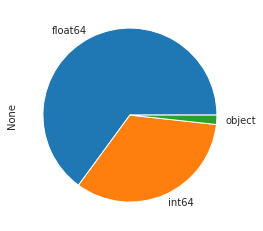

In [22]:
VisualiseDataset(dfHubble)

<AxesSubplot:>

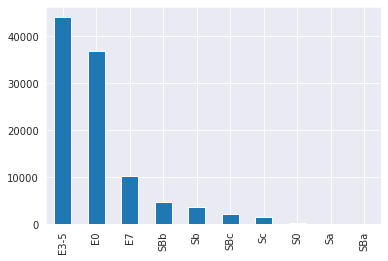

In [23]:
pd.value_counts(dfHubble['gz2_class']).plot.bar()

In [24]:
pd.value_counts(dfHubble['gz2_class'])

E3-5    44038
E0      36764
E7      10149
SBb      4692
Sb       3676
SBc      2267
Sc       1523
S0        221
Sa         92
SBa        27
Name: gz2_class, dtype: int64

In [25]:
dfHubble = dfHubble.rename(columns={"dr7objid": "OBJID", "ra": "RA", "dec":"DEC", "gz2_class":"TYPE"})

In [26]:
dfHubble.to_csv('../../Datas/GZ2Hubble.csv', index=False)